# Modeling Core Interaction Networks of TCGA-BRCA
TCGA: The Cancer Genome Atlas  
BRCA: Breast Invasive Carcinoma

# Importing Libraries and Configurations

In [1]:
import os
import sys

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd

# Add project root to Python's path
sys.path.append(os.path.abspath(os.path.join('..', '..')))

from config import (
    BRCA_INTERIM_FILES_DIRS,
    BRCA_PROCESSED_FILES_DIRS,
    INTERACTION_INFERENCE_PARAMETERS,
)

# Functions

In [2]:
def plot_core_network(df_interactions):
    # Create the graph
    G = nx.from_pandas_edgelist(
        df=df_interactions.query('correlation <= -0.45 & pvalue <= 0.01'),
        source='accession_id',
        target='gene_name',
    )

    # Optional: identify node types (if you want different colors)
    left_nodes = set(df_interactions['accession_id'])
    node_colors = ['lightblue' if n in left_nodes else 'lightgreen' for n in G.nodes()]

    # Use a force-directed layout
    pos = nx.spring_layout(G, k=0.8, iterations=100, seed=42)

    # Draw the graph
    plt.figure(figsize=(10, 7))
    nx.draw(
        G, pos,
        with_labels=True,
        node_color=node_colors,
        edge_color='gray',
        node_size=500,
        alpha=0.75,
        font_size=7,
    )

    plt.title("Natural Layout for Dense Bipartite Graph")
    plt.axis("off")
    plt.show()

# Data Preparation

In [3]:
# cohorts = list(BRCA_PROCESSED_FILES_DIRS.keys())
# cohorts.remove('project')

# for cohort in cohorts:
#     processed_file_path = os.path.join(
#         BRCA_PROCESSED_FILES_DIRS[cohort],
#         INTERACTION_INFERENCE_PARAMETERS['processed-file']
#     )
    
#     df_interactions = pd.read_csv(processed_file_path, low_memory=False) \
#         .query('is_interaction_of_interest == 1') \
#         .drop(columns=['is_interaction_of_interest']) \
#         .reset_index(drop=True)
    
#     interim_file_path = os.path.join(
#         BRCA_INTERIM_FILES_DIRS[cohort],
#         'inferred-interactions-of-interest.csv'
#     )
        
#     df_interactions.to_csv(interim_file_path, index=False)

# Data Loading

In [4]:
cohorts = list(BRCA_INTERIM_FILES_DIRS.keys())
interactions_of_interest = dict()

for cohort in cohorts:
    interactions_of_interest[cohort] = pd.read_csv(
        os.path.join(
            BRCA_INTERIM_FILES_DIRS[cohort],
            'inferred-interactions-of-interest.csv'
        )
    )

# Core Networks

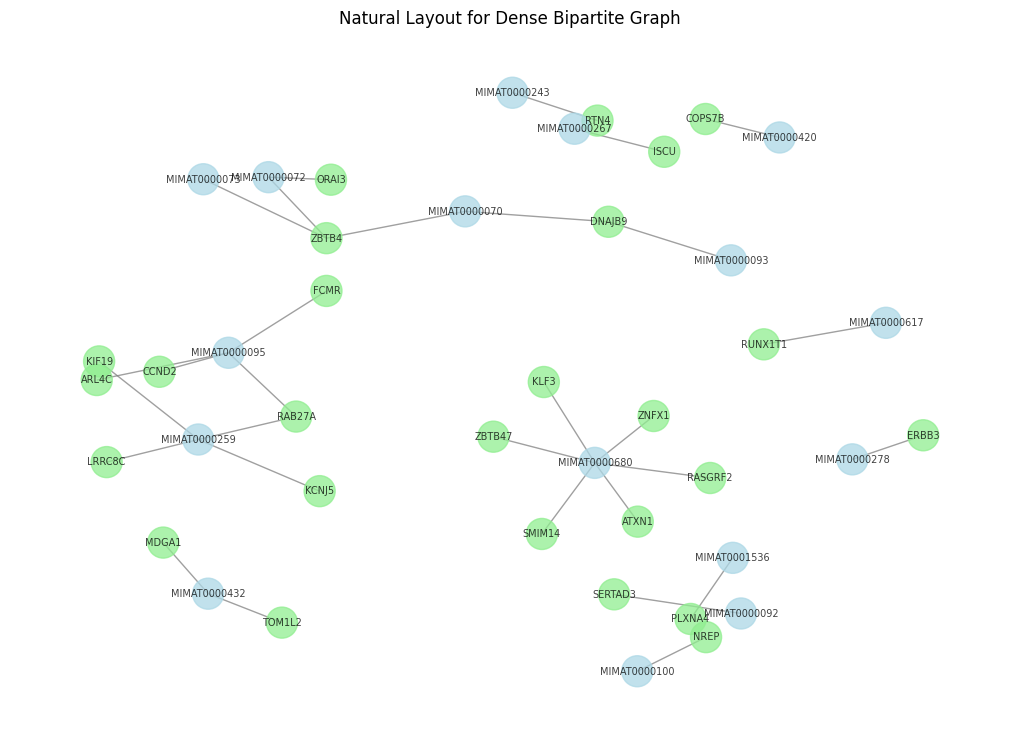

In [5]:
plot_core_network(interactions_of_interest['basal-like'])

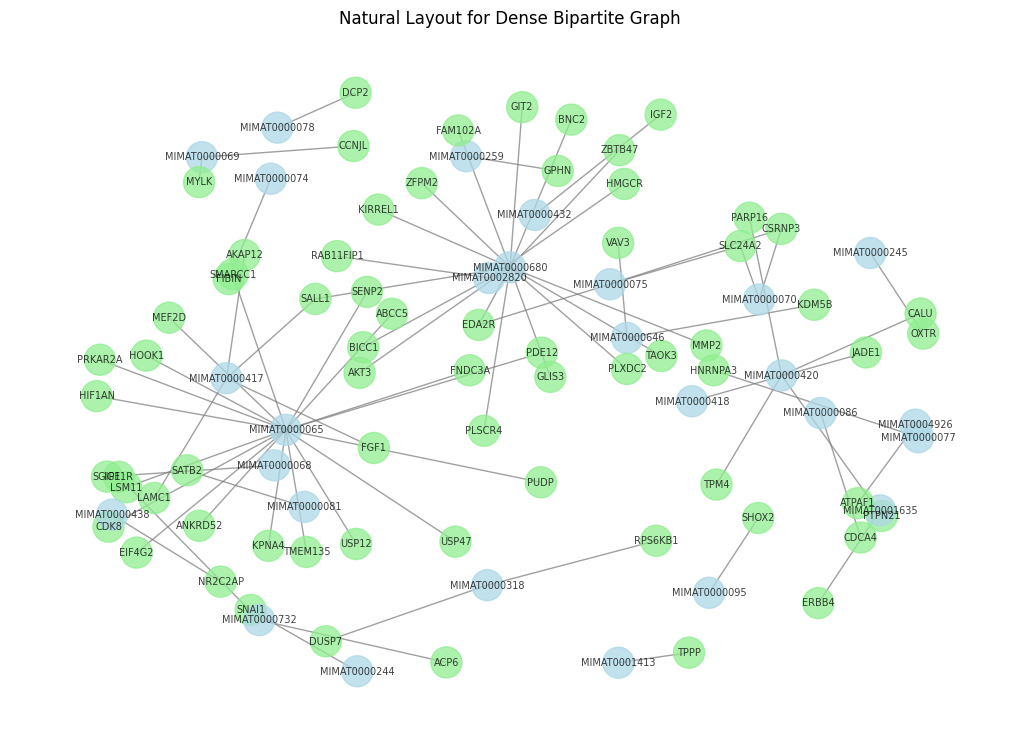

In [6]:
plot_core_network(interactions_of_interest['her2-enriched'])

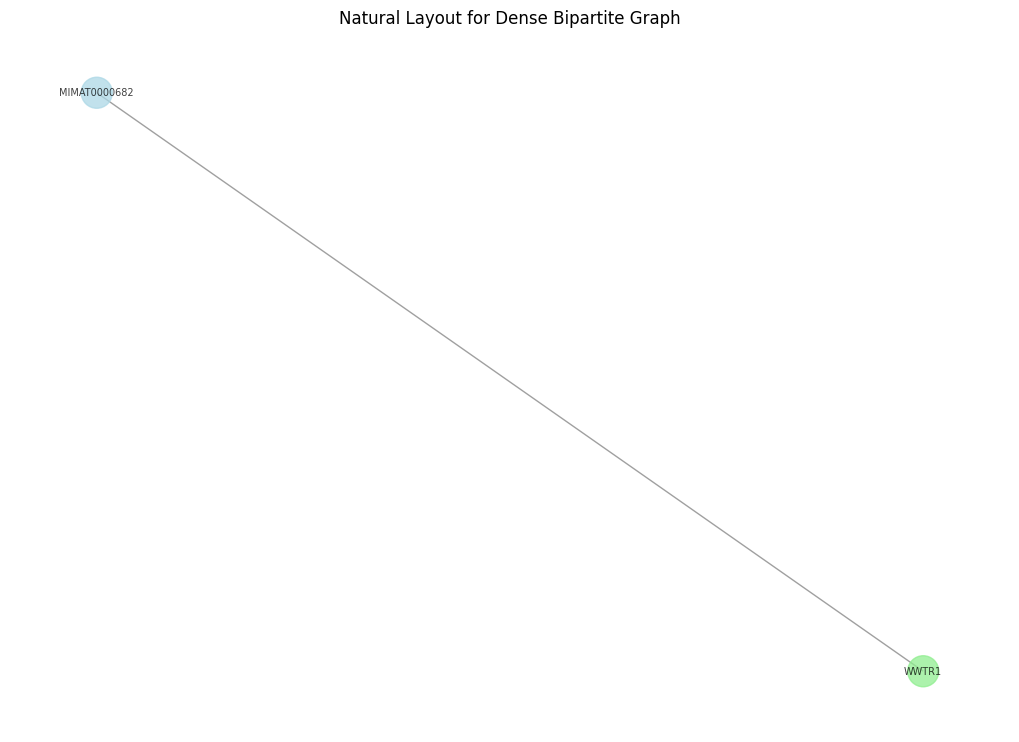

In [7]:
plot_core_network(interactions_of_interest['luminal-a'])

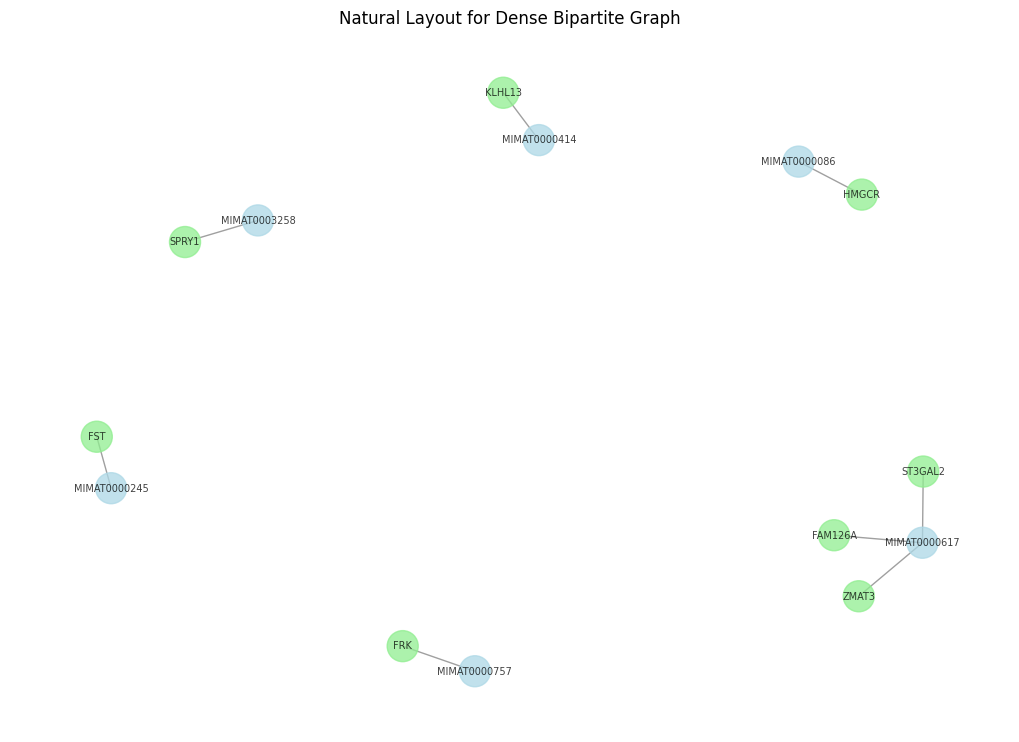

In [8]:
plot_core_network(interactions_of_interest['luminal-b'])

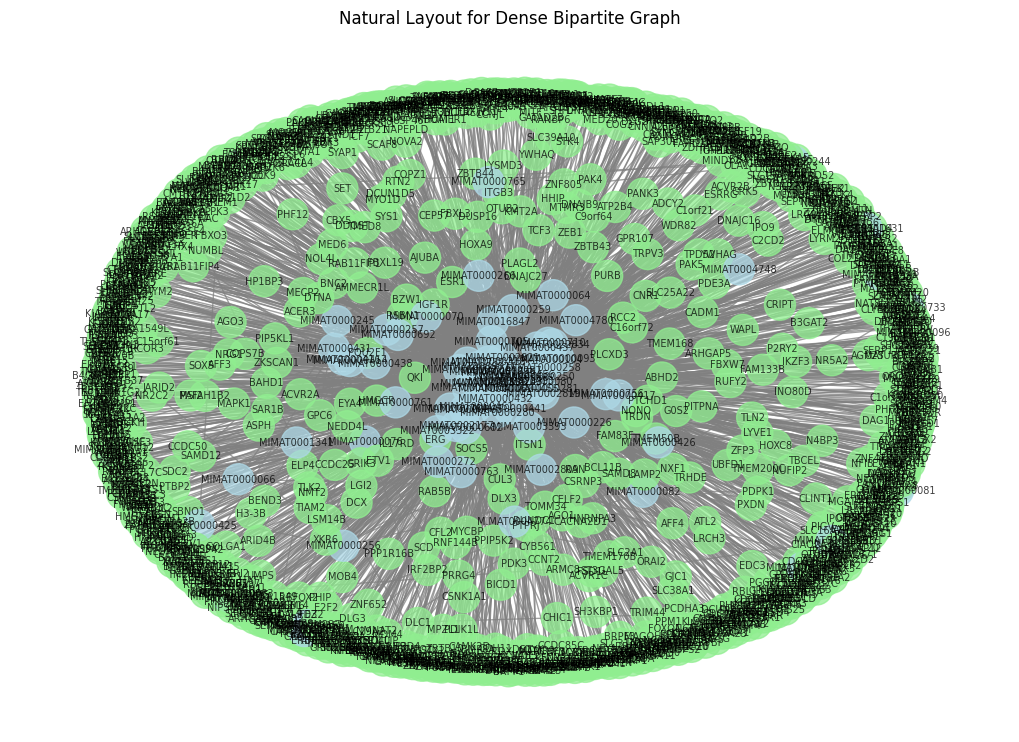

In [9]:
plot_core_network(interactions_of_interest['paired-normal'])